# Exploring Dandiset 001349: GABAergic Inputs and Neural Networks in Developing Mouse Somatosensory Cortex

**Note**: This notebook was generated with AI assistance. Please verify all code and results independently.

## Overview
This notebook explores [Dandiset 001349](https://dandiarchive.org/dandiset/001349/0.250520.1729), which contains calcium imaging data from the somatosensory cortex of developing mice (P11-P21). The dataset includes two-photon imaging data synchronized with behavioral recordings.

This notebook demonstrates:
- Loading data using the DANDI API
- Examining calcium imaging data structure
- Visualizing fluorescence signals and derived measurements
- Working with ROI (Region of Interest) data

## Required Packages

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
from dandi.dandiapi import DandiAPIClient

## Loading Data from DANDI

In [2]:
# Initialize DANDI API client
client = DandiAPIClient()
dandiset = client.get_dandiset("001349", "0.250520.1729")

# Get URL for a specific NWB file
url = next(dandiset.get_assets_by_glob("sub-C57-C2-2-AL/sub-C57-C2-2-AL_ses-2_ophys.nwb")).download_url

# Load the NWB file using streaming
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

## Data Structure Overview
The dataset contains several types of fluorescence measurements for each ROI:
- Raw fluorescence
- Corrected fluorescence
- ΔF/F
- Z-scores
- Calcium events

In [3]:
# Access the ophys processing module
ophys = nwb.processing['ophys']
fluorescence = ophys.data_interfaces['Fluorescence']

# Extract different signal types
dff = fluorescence.roi_response_series['dff_chn0'].data[:]
zscore = fluorescence.roi_response_series['z_score_chn0'].data[:]
ca_events = fluorescence.roi_response_series['ca_events_chn0'].data[:]

# Get imaging rate for time axis
imaging_rate = nwb.imaging_planes['ImagingPlane_1_chn1'].imaging_rate
time = np.arange(dff.shape[0]) / imaging_rate

## Visualizing Neural Activity

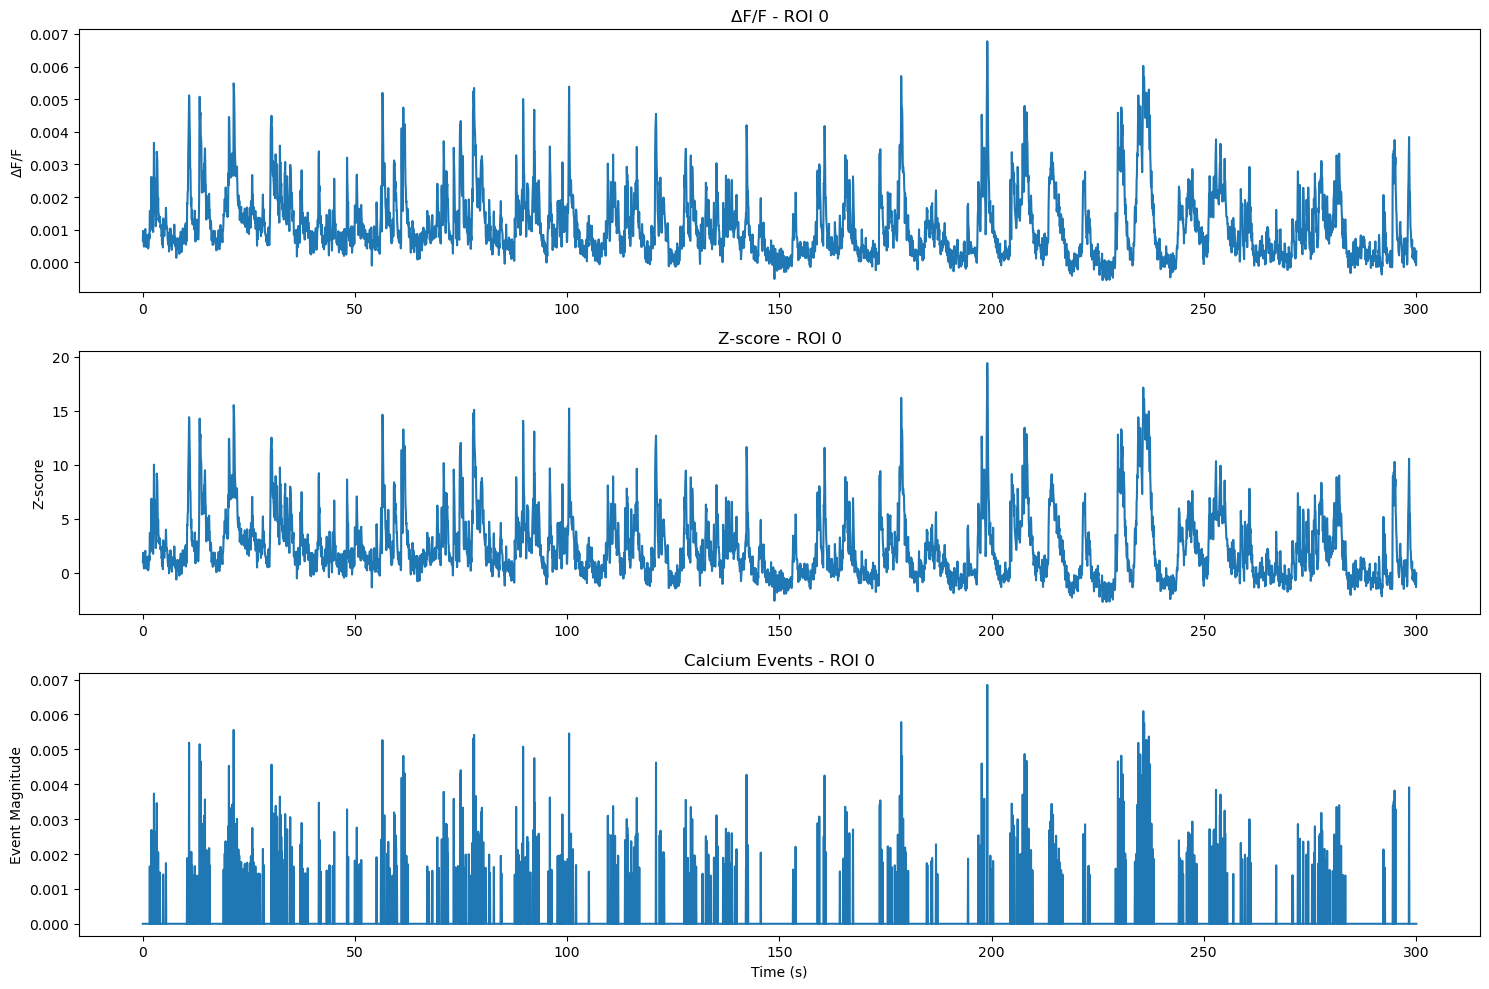

In [4]:
# Plot example traces from a single ROI
roi_idx = 0  # First ROI

plt.figure(figsize=(15, 10))

# DFF
plt.subplot(3, 1, 1)
plt.plot(time, dff[:, roi_idx])
plt.title(f'ΔF/F - ROI {roi_idx}')
plt.ylabel('ΔF/F')

# Z-score
plt.subplot(3, 1, 2)
plt.plot(time, zscore[:, roi_idx])
plt.title(f'Z-score - ROI {roi_idx}')
plt.ylabel('Z-score')

# Calcium events
plt.subplot(3, 1, 3)
plt.plot(time, ca_events[:, roi_idx])
plt.title(f'Calcium Events - ROI {roi_idx}')
plt.xlabel('Time (s)')
plt.ylabel('Event Magnitude')

plt.tight_layout()

## Population Activity Analysis

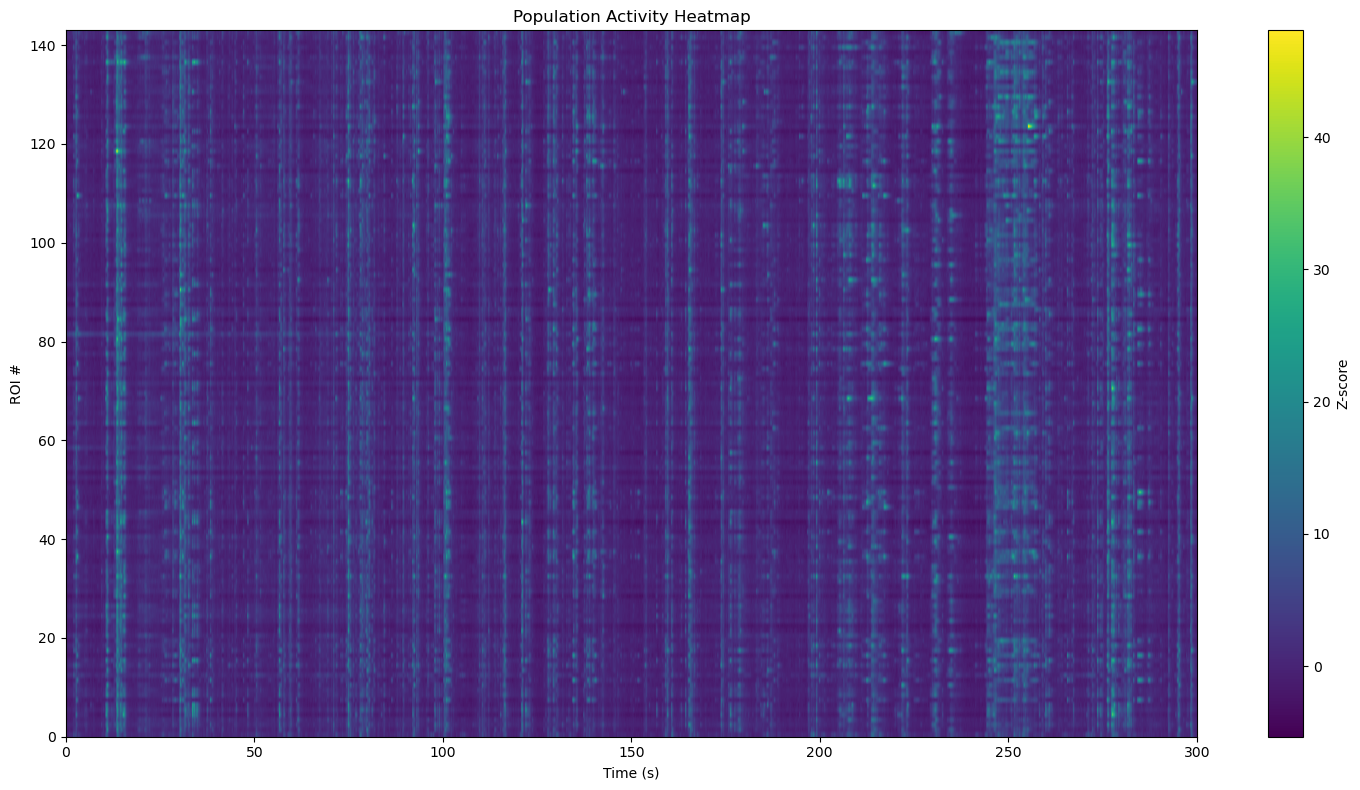

In [5]:
# Create a heatmap of activity across all ROIs
plt.figure(figsize=(15, 8))
plt.imshow(zscore.T, aspect='auto', extent=[0, time[-1], 0, zscore.shape[1]], 
           cmap='viridis')
plt.colorbar(label='Z-score')
plt.title('Population Activity Heatmap')
plt.xlabel('Time (s)')
plt.ylabel('ROI #')
plt.tight_layout()

## ROI Information
The dataset contains information about the ROIs, including their locations and pixel masks.

In [6]:
# Access ROI segmentation data
plane_seg = nwb.processing['ophys'].data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation_1']

# Display basic ROI information
print(f"Number of ROIs: {len(plane_seg.id.data)}")
print(f"Imaging plane location: {plane_seg.imaging_plane.location}")
print(f"Imaging rate: {plane_seg.imaging_plane.imaging_rate} Hz")

Number of ROIs: 143
Imaging plane location: hemisphere: right, layer: 2, location_id: 2
Imaging rate: 15.2309 Hz


## Next Steps
This dataset enables various analyses:
- Temporal correlation between ROIs
- Development of activity patterns across age
- Relationship between neural activity and behavior
- Network analysis of ROI interactions